<a href="https://colab.research.google.com/github/BrunoASNascimento/estudo-da-correlacao-da-poluicao-atmosfericas-com-os-gastos-no-sus/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [109]:
import os
import pandas as pd
from urllib.parse import quote
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_theme(style="darkgrid")

# Cetesb

Fonte: https://servicos.cetesb.sp.gov.br/qa/

## Configuraçõa de leitura de dados Cetesb

In [4]:
try:
    print('Try local upload documents')
    dir_cetesb = 'data\cetesb'
    cetesb_files = os.listdir(dir_cetesb)
    print('Get local documents')
except:
    print('Get in github')
    cetesb_files = ['cetesb_1-Parque D.Pedro II.csv', 'cetesb_17-Osasco.csv', 'cetesb_27-Pinheiros.csv', 'cetesb_29-Grajaú-Parelheiros.csv', 'cetesb_33-Itaim Paulista.csv',
 'cetesb_36-Marg.Tietê-Pte Remédios.csv', 'cetesb_40-Guarulhos-Pimentas.csv', 'cetesb_41-Campinas-Taquaral.csv', 'cetesb_48-Paulínia-Sta Terezinha.csv', 'cetesb_56-S.José Campos-Jd.Satelite.csv',
 'cetesb_58-Taubaté.csv', 'cetesb_62-Guaratinguetá.csv', 'cetesb_64-Limeira.csv', 'cetesb_7-São Caetano do Sul.csv', 'cetesb_74-Jundiaí.csv', 'cetesb_77-Piracicaba.csv',
 'cetesb_8-Congonhas.csv', 'cetesb_80-São José do Rio Preto.csv', 'cetesb_83-Santos-Ponta da Praia.csv', 'cetesb_84-Ribeirão Preto.csv']

Try local upload documents
Get local documents


## Função para fazer a limpeza dos dados

In [11]:
def clean_data_cetesb(df):    
    df.rename(columns={
        'MP10 µg/m³|Média  horária': 'MP10_hourly_mean',
        'MP10 µg/m³|Média  24 h': 'MP10_daily_mean', 
        'MP10 µg/m³|Índice /  Qualidade': 'MP10_index',
        'MP2.5 µg/m³|Média  horária': 'MP25_hourly_mean', 
        'MP2.5 µg/m³|Média  24 h': 'MP25_daily_mean',
        'MP2.5 µg/m³|Índice /  Qualidade': 'MP25_index'
    }, inplace=True)
    df.loc[df['Hora']=='24:00','Hora'] = '0:00'
    df['station_time'] = pd.to_datetime(df['Data']+' '+df['Hora'])
    return df

## Função para calcular o otif dos dados coletados

In [12]:
def otif_cetesb(station):
    try:
        df = pd.read_csv(f"{dir_cetesb}\{station}")
    except:
        url = f"https://raw.githubusercontent.com/BrunoASNascimento/estudo-da-correlacao-da-poluicao-atmosfericas-com-os-gastos-no-sus/main/data/cetesb/{quote(station)}"
        # print(url)
        df = pd.read_csv(url)
    clean_data_cetesb(df)
    theoretical_data_size = len(pd.date_range(start=df['station_time'].min(), end=df['station_time'].max(), freq='h'))     

    data = {
        'station': df['station_name'][0],
        'name_file': station,
        'otif_MP10': len(df['MP10_index'].dropna())/theoretical_data_size,
        'otif_MP25': len(df['MP25_index'].dropna())/theoretical_data_size,
    }

    return data

## DataFrame sobre os otifs MP10 e MP2.5

In [13]:
df_otif = pd.DataFrame([
    otif_cetesb(info_cetesb)
    for info_cetesb in cetesb_files
    ])
df_otif

,station,name_file,otif_MP10,otif_MP25
0,Parque D.Pedro II,cetesb_1-Parque D.Pedro II.csv,0.824208,0.360889
1,Osasco,cetesb_17-Osasco.csv,0.857944,0.309931
2,Pinheiros,cetesb_27-Pinheiros.csv,0.468278,0.575389
3,Grajaú-Parelheiros,cetesb_29-Grajaú-Parelheiros.csv,0.801347,0.738625
4,Itaim Paulista,cetesb_33-Itaim Paulista.csv,0.726014,0.402667
5,Marg.Tietê-Pte Remédios,cetesb_36-Marg.Tietê-Pte Remédios.csv,0.852806,0.791653
6,Guarulhos-Pimentas,cetesb_40-Guarulhos-Pimentas.csv,0.437861,0.464861
7,Campinas-Taquaral,cetesb_41-Campinas-Taquaral.csv,0.530875,0.000000
8,Paulínia-Sta Terezinha,cetesb_48-Paulínia-Sta Terezinha.csv,0.247153,0.131014
9,S.José Campos-Jd.Satelite,cetesb_56-S.José Campos-Jd.Satelite.csv,0.524681,0.527167


## Otif_MP10 >= 80%

In [7]:
df_otif[df_otif['otif_MP10']>=0.8].reset_index(drop=True)

,station,name_file,otif_MP10,otif_MP25
0,Parque D.Pedro II,cetesb_1-Parque D.Pedro II.csv,0.824208,0.360889
1,Osasco,cetesb_17-Osasco.csv,0.857944,0.309931
2,Grajaú-Parelheiros,cetesb_29-Grajaú-Parelheiros.csv,0.801347,0.738625
3,Marg.Tietê-Pte Remédios,cetesb_36-Marg.Tietê-Pte Remédios.csv,0.852806,0.791653
4,São Caetano do Sul,cetesb_7-São Caetano do Sul.csv,0.821278,0.247681
5,Jundiaí,cetesb_74-Jundiaí.csv,0.858833,0.162028
6,Piracicaba,cetesb_77-Piracicaba.csv,0.828819,0.830306
7,Congonhas,cetesb_8-Congonhas.csv,0.854819,0.827014
8,São José do Rio Preto,cetesb_80-São José do Rio Preto.csv,0.858597,0.821986
9,Santos-Ponta da Praia,cetesb_83-Santos-Ponta da Praia.csv,0.864583,0.854278


## Otif_MP2.5 >= 80%

In [8]:
df_otif[df_otif['otif_MP25']>=0.8].reset_index(drop=True)

,station,name_file,otif_MP10,otif_MP25
0,Piracicaba,cetesb_77-Piracicaba.csv,0.828819,0.830306
1,Congonhas,cetesb_8-Congonhas.csv,0.854819,0.827014
2,São José do Rio Preto,cetesb_80-São José do Rio Preto.csv,0.858597,0.821986
3,Santos-Ponta da Praia,cetesb_83-Santos-Ponta da Praia.csv,0.864583,0.854278


## Indice de qualidade do ar

![alt text](https://i.ibb.co/ypm47Gj/estrutura-do-indice-de-qualidade-do-ar.png)

In [72]:
def air_quality_index(df, mp_type):
    df['year'] = df['station_time'].dt.year
    df['month'] = df['station_time'].dt.month
    df.drop(columns=[
        'Hora', 'Data',
        'MP10_hourly_mean', 'MP10_daily_mean',
        'MP25_hourly_mean', 'MP25_daily_mean',
        'station_time'
    ], inplace=True)

    filter_value = ['year', 'month', 'station_name']

    result = pd.merge(
        df[filter_value].drop_duplicates(),
        df[df[mp_type] <= 80].groupby(
            filter_value,
            as_index=False
        )[mp_type].count().rename(columns={
            mp_type: 'air_quality_good'
        }
        ),
        how='left',
        on=filter_value
    ).merge(
        df[df[mp_type] > 80].groupby(
            filter_value,
            as_index=False
        )[mp_type].count().rename(columns={
            mp_type: 'air_quality_bad'
        }
        ),
        how='left',
        on=filter_value).merge(
            df.groupby(filter_value)[mp_type].count(
            ).reset_index(name='control'),
            how='left',
        on=filter_value
    ).fillna(0)
    result = result[result['control'] > 0]
    result['air_quality_good_normalizated'] = (
        result['air_quality_good'] / result['control'])
    result['air_quality_bad_normalizated'] = (
        result['air_quality_bad'] / result['control'])
    result['MP_TYPE'] = mp_type

    return result

## Função para normalização mensal dos dados coletados da Cetesb

In [104]:
station='cetesb_77-Piracicaba.csv'
df = clean_data_cetesb(pd.read_csv(f"{dir_cetesb}\{station}"))
result = air_quality_index(df, 'MP25_index')
result['month_year'] =   (result['year'].astype(str)+'/' +result['month'].astype(str).str.zfill(2))
result.sort_values(by='month_year',inplace=True,ascending=True)
result.head(20)

,year,month,station_name,air_quality_good,air_quality_bad,control,air_quality_good_normalizated,air_quality_bad_normalizated,MP_TYPE,month_year
0,2012,8,Piracicaba,48,0.0,48,1.0,0.0,MP25_index,2012/08
1,2012,9,Piracicaba,720,0.0,720,1.0,0.0,MP25_index,2012/09
2,2012,10,Piracicaba,744,0.0,744,1.0,0.0,MP25_index,2012/10
3,2012,11,Piracicaba,720,0.0,720,1.0,0.0,MP25_index,2012/11
4,2012,12,Piracicaba,463,0.0,463,1.0,0.0,MP25_index,2012/12
5,2013,1,Piracicaba,626,0.0,626,1.0,0.0,MP25_index,2013/01
6,2013,2,Piracicaba,498,0.0,498,1.0,0.0,MP25_index,2013/02
7,2013,3,Piracicaba,744,0.0,744,1.0,0.0,MP25_index,2013/03
8,2013,4,Piracicaba,720,0.0,720,1.0,0.0,MP25_index,2013/04
9,2013,5,Piracicaba,744,0.0,744,1.0,0.0,MP25_index,2013/05


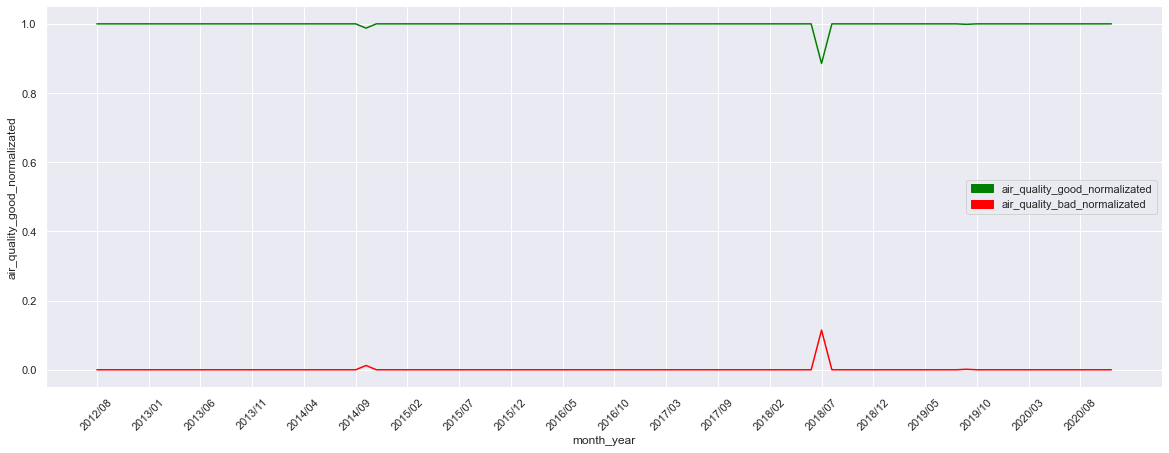

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)

leg_good = mpatches.Patch(color='green', label='air_quality_good_normalizated')
leg_bad = mpatches.Patch(color='red', label='air_quality_bad_normalizated')

img = sns.lineplot(
    data=result,
    x='month_year',
    y='air_quality_good_normalizated',
    color='green',
    ax=ax
)
sns.lineplot(
    data=result,
    x='month_year',
    y='air_quality_bad_normalizated',
    color='red',
    ax=ax
)
plt.legend(handles=[leg_good,leg_bad])
plt.xticks([result['month_year'][i] for i in range(0,result.shape[0]+1,5)],rotation=45)
sns.despine()